<a href="https://colab.research.google.com/github/SWJongMinHONG/Machine-learning/blob/main/20230410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
## y = x^2의 미분값 구하기
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
  y =  x ** 2
dy_dx = tape.gradient(y,x)
dy_dx.numpy()

4.0

In [8]:
g = tf.random.Generator.from_seed(2020)
x = g.normal(shape=(10,))
y = 3 * x -2 

In [9]:
m2 = tf.constant([[1.,1.]]) ##2차원 구조 만든것같음

In [10]:
def cal_mse(x,y,a,b):
    y_pred = a*x + b ## 그래프
    squared_error = (y_pred - y) **2 
    mean_squared_error = tf.reduce_mean(squared_error)

    return mean_squared_error

In [11]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 300

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x,y,a,b)
    if mse < 0.00001: ## 오차한계
        break
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
    a.assign_sub(d_a * 0.05) ## a = a - d_a * 0.05(학습률)
    b.assign_sub(d_b * 0.05) ## b = b - d_b * 0.05(학습률)

    if epoch % 20 ==0:
        print("EPOCH %d - MSE : %.4f - a: %.2f -b : %.2f"%(epoch, mse, a, b))

EPOCH 20 - MSE : 1.1415 - a: 1.74 -b : -0.75
EPOCH 40 - MSE : 0.2881 - a: 2.37 -b : -1.37
EPOCH 60 - MSE : 0.0728 - a: 2.69 -b : -1.68
EPOCH 80 - MSE : 0.0184 - a: 2.84 -b : -1.84
EPOCH 100 - MSE : 0.0046 - a: 2.92 -b : -1.92
EPOCH 120 - MSE : 0.0012 - a: 2.96 -b : -1.96
EPOCH 140 - MSE : 0.0003 - a: 2.98 -b : -1.98
EPOCH 160 - MSE : 0.0001 - a: 2.99 -b : -1.99
EPOCH 180 - MSE : 0.0000 - a: 2.99 -b : -1.99


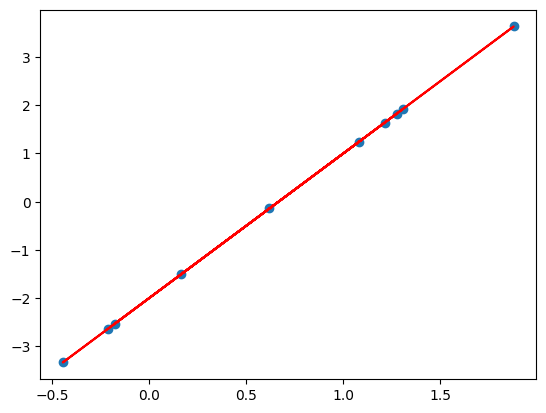

In [12]:
y_pred = 3 * x -2
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'r')
plt.show()

In [13]:
g = tf.random.Generator.from_seed(2020)
x1 = g.normal(shape=(10,))
noise = np.random.normal(0,1,size = (10,))
y = 3 * x - 2 + noise

In [14]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

HS = 1000

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x1,y,a,b)
    if mse < 0.000001: ## 오차한계
        break
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
    a.assign_sub(d_a * 0.05) ## a = a - d_a * 0.05(학습률)
    b.assign_sub(d_b * 0.05) ## b = b - d_b * 0.05(학습률)

    if epoch % 20 ==0:
        print("EPOCH %d - MSE : %.4f - a: %.2f -b : %.2f"%(epoch, mse, a, b))

EPOCH 20 - MSE : 1.3837 - a: 1.70 -b : -0.55
EPOCH 40 - MSE : 0.6852 - a: 2.28 -b : -1.11
EPOCH 60 - MSE : 0.5090 - a: 2.56 -b : -1.39
EPOCH 80 - MSE : 0.4645 - a: 2.70 -b : -1.54
EPOCH 100 - MSE : 0.4532 - a: 2.77 -b : -1.61
EPOCH 120 - MSE : 0.4504 - a: 2.81 -b : -1.65
EPOCH 140 - MSE : 0.4497 - a: 2.82 -b : -1.66
EPOCH 160 - MSE : 0.4495 - a: 2.83 -b : -1.67
EPOCH 180 - MSE : 0.4495 - a: 2.84 -b : -1.68
EPOCH 200 - MSE : 0.4494 - a: 2.84 -b : -1.68
EPOCH 220 - MSE : 0.4494 - a: 2.84 -b : -1.68
EPOCH 240 - MSE : 0.4494 - a: 2.84 -b : -1.68
EPOCH 260 - MSE : 0.4494 - a: 2.84 -b : -1.68
EPOCH 280 - MSE : 0.4494 - a: 2.84 -b : -1.68
EPOCH 300 - MSE : 0.4494 - a: 2.84 -b : -1.68


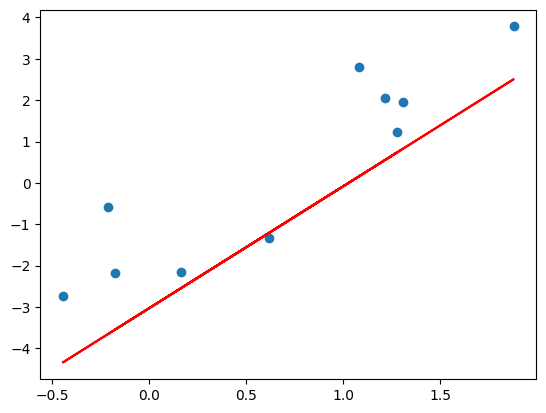

In [ ]:
y_pred = 2.95* x1 -3.03
plt.scatter(x1,y)
plt.plot(x,y_pred, color = 'r')
plt.show()

AttributeError: ignored

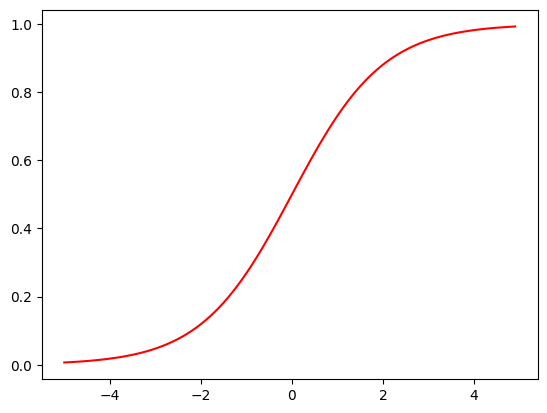

In [ ]:
xx = tf.range(-5,5,0.1)
yy = tf = tf.nn.sigmoid(xx)
plt.plot(xx,yy,'r-')

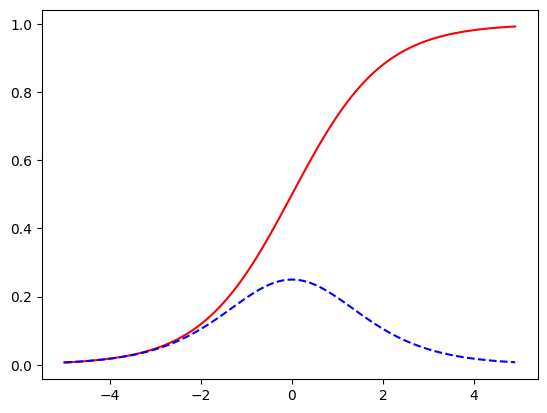

In [ ]:
with tf.GradientTape() as tape:
     tape.watch(xx)
     yy = tf.sigmoid(xx)
dy = tape.gradient(yy,xx)
plt.plot(xx,yy,"r-")
plt.plot(xx,dy,"b--")
plt.show()

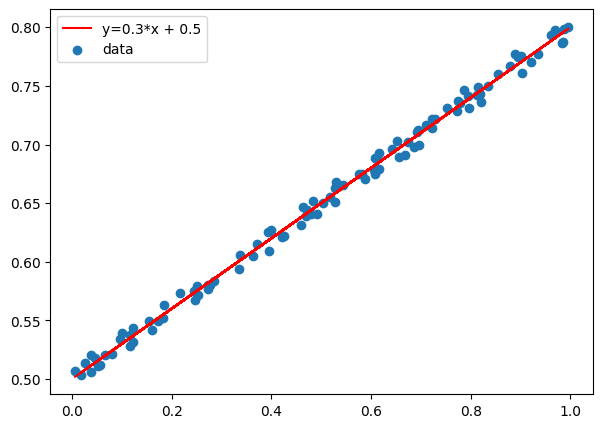

w:0.3,b:0.5


In [ ]:
def make_linear(w=0.5, b =0.8, size = 50, noise= 1.0):
  x= np.random.rand(size)
  y =  w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy= y + noise
  plt.figure(figsize=(7,5))
  plt.plot(x,y,color='r',label=f'y={w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize = 10)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy
x,y = make_linear(w=.3,b=0.5,size=100,noise=0.01)

단순 선형 회귀 모델 만들기

In [ ]:
x = np.arange(1,6)
y1 = 3 * x +2

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='sgd',loss = 'mse',metrics = ['mae'])

In [ ]:
history1 = model1.fit(x,y1,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 357ms/step - loss: 276.1387 - mae: 15.3749
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 160.9577 - mae: 11.7649
Epoch 3/1200
1/1 [==============================] - 0s 10ms/step - loss: 93.8357 - mae: 9.0090
Epoch 4/1200
1/1 [==============================] - 0s 9ms/step - loss: 54.7200 - mae: 6.9051
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 31.9251 - mae: 5.2990
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 18.6411 - mae: 4.0728
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 10.8996 - mae: 3.1366
Epoch 8/1200
1/1 [==============================] - 0s 10ms/step - loss: 6.3880 - mae: 2.4219
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.7586 - mae: 1.8762
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 2.2260 - mae: 1.4595
Epoch 11/1200
1/1 [==============================

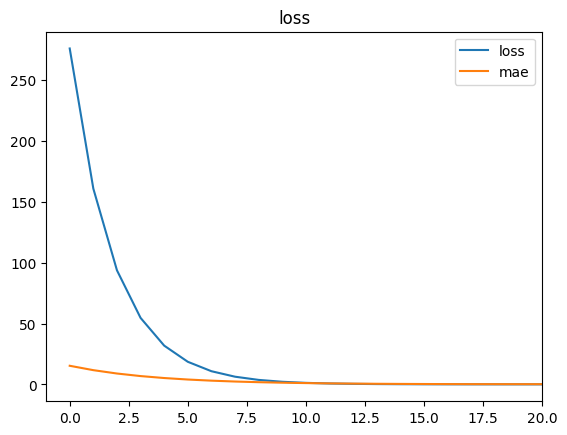

In [ ]:
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('loss')
plt.legend()
plt.show()

In [ ]:
model1.evaluate(x,y1)

1/1 [==============================] - 0s 381ms/step - loss: 2.7132e-05 - mae: 0.0045


[2.713183312152978e-05, 0.004471016116440296]

In [ ]:
model1.predict([10])

1/1 [==============================] - 0s 75ms/step


array([[32.02161]], dtype=float32)

In [4]:
g = tf.random.Generator.from_seed(2020)
x = g.normal(shape = (10,))
noise_1 = np.random.normal(0.1, size = (10,))
y = 3*x - 2 + noise_1

In [17]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 500
prev_mse = 0.0

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x, y, a, b)
    if abs(mse - prev_mse) < 0.000001:
        break
    prev_mse = mse
    
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
    a.assign_sub(d_a * 0.05)## a = a - d_a*0.05(학습률)
    b.assign_sub(d_b * 0.05)## b = b - d_b*0.05(학습률)

    if epoch % 10 == 0:
        print("EPOCH %d - MSE : %.4f - a: %.2f - b : %.2f"%(epoch, mse, a, b))
     

EPOCH 10 - MSE : 2.3496 - a: 1.16 - b : -0.16
EPOCH 20 - MSE : 1.3837 - a: 1.70 - b : -0.55
EPOCH 30 - MSE : 0.9185 - a: 2.04 - b : -0.87
EPOCH 40 - MSE : 0.6852 - a: 2.28 - b : -1.11
EPOCH 50 - MSE : 0.5679 - a: 2.44 - b : -1.27
EPOCH 60 - MSE : 0.5090 - a: 2.56 - b : -1.39
EPOCH 70 - MSE : 0.4794 - a: 2.64 - b : -1.48
EPOCH 80 - MSE : 0.4645 - a: 2.70 - b : -1.54
EPOCH 90 - MSE : 0.4570 - a: 2.74 - b : -1.58
EPOCH 100 - MSE : 0.4532 - a: 2.77 - b : -1.61
EPOCH 110 - MSE : 0.4514 - a: 2.79 - b : -1.63
EPOCH 120 - MSE : 0.4504 - a: 2.81 - b : -1.65
EPOCH 130 - MSE : 0.4499 - a: 2.82 - b : -1.66
EPOCH 140 - MSE : 0.4497 - a: 2.82 - b : -1.66
EPOCH 150 - MSE : 0.4496 - a: 2.83 - b : -1.67
EPOCH 160 - MSE : 0.4495 - a: 2.83 - b : -1.67
EPOCH 170 - MSE : 0.4495 - a: 2.84 - b : -1.68
EPOCH 180 - MSE : 0.4495 - a: 2.84 - b : -1.68


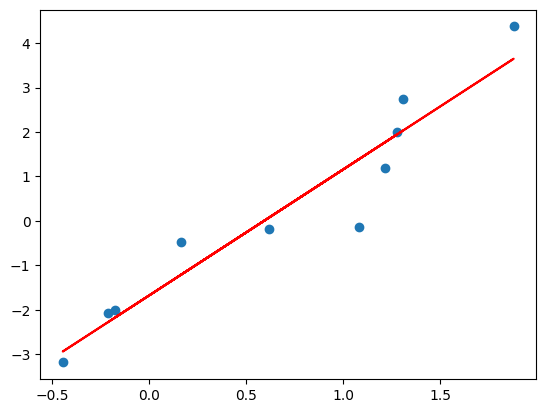

In [19]:
y_pred = 2.84*x -1.68
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'r')
plt.show()